In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cord"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [32]:
import os

CORD_PATH = os.path.join("datasets/april", "cord")

In [35]:
import pandas as pd

def load_titanic_data(filename):
    csv_path = os.path.join('octave/april', filename)
    return pd.read_csv(csv_path)

In [36]:
train_data = load_titanic_data("663249270_T_ONTIME_REPORTING.csv")

In [37]:
#### peek
train_data.head(15)

,YEAR,QUARTER,MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,Unnamed: 25
0,2020,2,4,OH,N541EA,11057,1105703,31057,"Charlotte, NC",North Carolina,...,60.0,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2,4,OH,N524AE,11057,1105703,31057,"Charlotte, NC",North Carolina,...,66.0,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2,4,OH,N532EA,11057,1105703,31057,"Charlotte, NC",North Carolina,...,62.0,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2,4,OH,N540EA,11057,1105703,31057,"Charlotte, NC",North Carolina,...,64.0,1.0,388.0,0.0,47.0,0.0,0.0,0.0,NaN,NaN
4,2020,2,4,OH,N539EA,11057,1105703,31057,"Charlotte, NC",North Carolina,...,66.0,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020,2,4,OH,N587NN,11057,1105703,31057,"Charlotte, NC",North Carolina,...,56.0,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020,2,4,OH,N588NN,11057,1105703,31057,"Charlotte, NC",North Carolina,...,60.0,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020,2,4,OH,N588NN,11057,1105703,31057,"Charlotte, NC",North Carolina,...,63.0,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020,2,4,OH,N534AE,14100,1410005,34100,"Philadelphia, PA",Pennsylvania,...,72.0,1.0,477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020,2,4,OH,N506AE,14100,1410005,34100,"Philadelphia, PA",Pennsylvania,...,70.0,1.0,477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313382 entries, 0 to 313381
Data columns (total 26 columns):
YEAR                     313382 non-null int64
QUARTER                  313382 non-null int64
MONTH                    313382 non-null int64
OP_UNIQUE_CARRIER        313382 non-null object
TAIL_NUM                 222875 non-null object
ORIGIN_AIRPORT_ID        313382 non-null int64
ORIGIN_AIRPORT_SEQ_ID    313382 non-null int64
ORIGIN_CITY_MARKET_ID    313382 non-null int64
ORIGIN_CITY_NAME         313382 non-null object
ORIGIN_STATE_NM          313382 non-null object
DEST_AIRPORT_ID          313382 non-null int64
DEST_AIRPORT_SEQ_ID      313382 non-null int64
DEST_CITY_MARKET_ID      313382 non-null int64
DEST_CITY_NAME           313382 non-null object
DEST_STATE_NM            313382 non-null object
TAXI_OUT                 183344 non-null float64
AIR_TIME                 183006 non-null float64
FLIGHTS                  313382 non-null float64
DISTANCE                 313382

In [27]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
import tensorflow as tf

In [28]:
train_data.describe()

,YEAR,QUARTER,MONTH,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,TAXI_OUT,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,Unnamed: 25
count,648229.0,648229.0,648229.0,648229.000000,6.482290e+05,648229.000000,648229.000000,6.482290e+05,648229.000000,538149.000000,537244.000000,648229.0,648229.000000,53720.000000,53720.000000,53720.000000,53720.000000,53720.000000,797.000000,0.0
mean,2020.0,1.0,3.0,12661.810872,1.266185e+06,31759.659907,12661.716518,1.266176e+06,31759.468674,15.737909,112.870143,1.0,804.560092,23.945532,1.927848,14.433582,0.065786,20.093578,0.787955,NaN
std,0.0,0.0,0.0,1527.027526,1.527025e+05,1310.418902,1526.969579,1.526967e+05,1310.261510,8.003100,70.704622,0.0,582.208812,75.424605,22.213820,31.388051,1.445701,49.520467,0.409013,NaN
min,2020.0,1.0,3.0,10135.000000,1.013506e+06,30070.000000,10135.000000,1.013506e+06,30070.000000,1.000000,8.000000,1.0,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2020.0,1.0,3.0,11292.000000,1.129202e+06,30693.000000,11292.000000,1.129202e+06,30693.000000,11.000000,61.000000,1.0,373.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
50%,2020.0,1.0,3.0,12889.000000,1.288903e+06,31453.000000,12889.000000,1.288903e+06,31453.000000,14.000000,95.000000,1.0,650.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,NaN
75%,2020.0,1.0,3.0,14027.000000,1.402702e+06,32523.000000,14027.000000,1.402702e+06,32523.000000,18.000000,143.000000,1.0,1046.000000,22.000000,0.000000,20.000000,0.000000,22.000000,1.000000,NaN
max,2020.0,1.0,3.0,16869.000000,1.686901e+06,35991.000000,16869.000000,1.686901e+06,35991.000000,158.000000,694.000000,1.0,5095.000000,2560.000000,1173.000000,1083.000000,71.000000,1872.000000,1.000000,NaN


In [10]:
train_data['ORIGIN_AIRPORT_ID'].value_counts()

10397    32190
13930    25661
11298    24339
11292    20398
11057    19995
         ...  
14222        9
13983        9
13829        9
10165        9
11097        1
Name: ORIGIN_AIRPORT_ID, Length: 351, dtype: int64

In [49]:
train_data['TAIL_NUM'].describe()

count     222875
unique      4151
top       N830SK
freq         174
Name: TAIL_NUM, dtype: object

In [44]:
mobi = train_data['ORIGIN_CITY_NAME'].append(train_data['DEST_CITY_NAME'])

In [45]:
mobi

0         Charlotte, NC
1         Charlotte, NC
2         Charlotte, NC
3         Charlotte, NC
4         Charlotte, NC
              ...      
313377       Denver, CO
313378       Newark, NJ
313379       Newark, NJ
313380      Houston, TX
313381      Chicago, IL
Length: 626764, dtype: object

In [46]:
mobi.describe()

count          626764
unique            343
top       Chicago, IL
freq            37969
dtype: object

In [43]:
train_data['ORIGIN_CITY_NAME']

0                    Charlotte, NC
1                    Charlotte, NC
2                    Charlotte, NC
3                    Charlotte, NC
4                    Charlotte, NC
                    ...           
313377               Charlotte, NC
313378               Cleveland, OH
313379                 Buffalo, NY
313380    Harlingen/San Benito, TX
313381              Washington, DC
Name: ORIGIN_CITY_NAME, Length: 313382, dtype: object

In [31]:
train_data['FLIGHTS'].value_counts()

1.0    648229
Name: FLIGHTS, dtype: int64

In [30]:
x = train_data.columns
for i in range(len(x)):
    print('index ',i, " ", x[i])
    print(train_data[list([x[i]])[0]].value_counts())

index  0   YEAR
2020    648229
Name: YEAR, dtype: int64
index  1   QUARTER
1    648229
Name: QUARTER, dtype: int64
index  2   MONTH
3    648229
Name: MONTH, dtype: int64
index  3   OP_UNIQUE_CARRIER
WN    116689
DL     86291
AA     80330
OO     74153
UA     53803
YX     29968
MQ     27041
9E     25996
B6     25657
OH     25215
AS     21380
NK     19729
YV     18273
F9     12765
EV     12412
G4     11754
HA      6773
Name: OP_UNIQUE_CARRIER, dtype: int64
index  4   TAIL_NUM
N494HA    295
N488HA    292
N489HA    290
N493HA    287
N475HA    271
         ... 
N794AN      1
N860DA      1
N14106      1
N190DN      1
N829NW      1
Name: TAIL_NUM, Length: 5444, dtype: int64
index  5   ORIGIN_AIRPORT_ID
10397    33888
13930    27719
11298    25743
11292    22154
11057    20581
         ...  
12119       12
13983        9
13829        9
10165        8
14222        8
Name: ORIGIN_AIRPORT_ID, Length: 351, dtype: int64
index  6   ORIGIN_AIRPORT_SEQ_ID
1039707    33888
1393007    27719
1129806    25

337.0     3917
296.0     3089
399.0     2770
733.0     2689
404.0     2576
          ... 
382.0        6
1582.0       6
498.0        6
1336.0       2
520.0        1
Name: DISTANCE, Length: 1465, dtype: int64
index  19   CARRIER_DELAY
0.0       29783
1.0         683
15.0        672
2.0         666
16.0        608
          ...  
794.0         1
198.0         1
380.0         1
791.0         1
1059.0        1
Name: CARRIER_DELAY, Length: 655, dtype: int64
index  20   WEATHER_DELAY
0.0      51990
3.0         48
1.0         48
7.0         46
4.0         40
         ...  
215.0        1
863.0        1
219.0        1
544.0        1
193.0        1
Name: WEATHER_DELAY, Length: 256, dtype: int64
index  21   NAS_DELAY
0.0      24424
15.0      1503
16.0      1350
17.0      1178
18.0      1152
         ...  
620.0        1
984.0        1
245.0        1
243.0        1
247.0        1
Name: NAS_DELAY, Length: 330, dtype: int64
index  22   SECURITY_DELAY
0.0     53548
16.0       14
15.0       11
5.0   

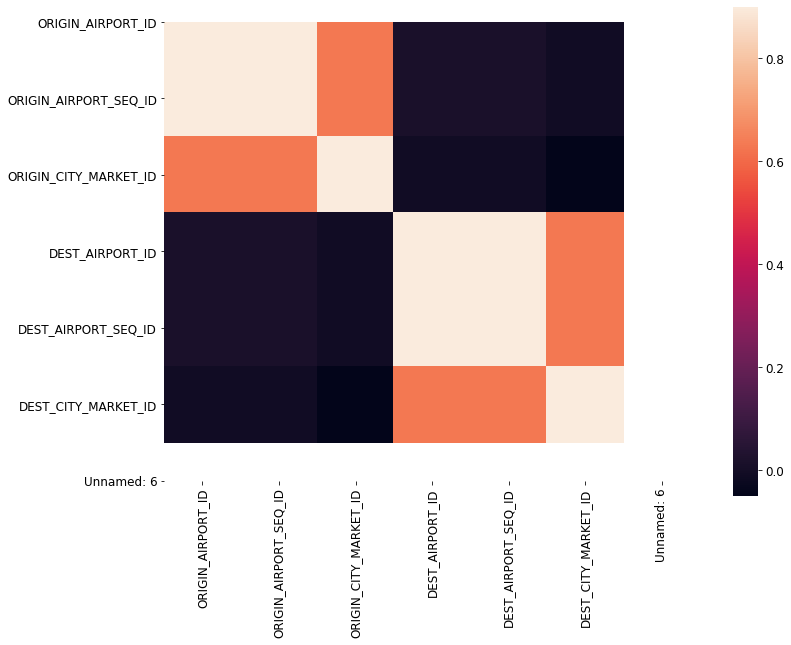

In [13]:
#Correlation map to see how features are correlated with SalePrice
import seaborn as sns

corrmat = train_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)